In [ ]:
# !git clone https://github.com/VaibhavYadav/pytorch_pix2code.git
# !git clone --single-branch --branch master https://github.com/Mohammad-Daaboul98/Web-Genrater-Dataset.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import pickle

In [ ]:
data = {
'\n': 0,
'<START>': 1,
'<END>': 2,
'}': 3,
'{': 4,
',': 5,
' ': 6,
'header': 7,
'navbar-dark': 8,
'navbar-light': 9,
'navbar-primary': 10,
'navbar-warning': 11,
'navbar-danger': 12,
'navbar-secondary': 13,
'navbar-success': 14,
'navbar-brand': 15,
'navbar-toggler': 16,
'navbar-toggler-icon': 17,
'navbar-collapse': 18,
'navbar-nav': 19,
'nav-item': 20,
'nav-item-active': 21,
'nav-item-unactive': 22,
'nav-link': 23,
'nav-link-undisabled': 24,
'nav-link-disabled': 25,
'nav-link-active': 26,
'form-inline-success': 27,
'form-inline-danger': 28,
'form-inline-primary': 29,
'form-primary': 30,
'form-danger': 31,
'form-inline-secondary': 32,
'form-secondary': 33,
'form-inline-warning': 34,
'form-inline-dark': 35,
'form-dark': 36,
'form-inline-light': 37,
'from-d-flex': 38,
'form-control-me-2': 39,
'container-fluid': 40,
'container': 41,
'container-marketing': 42,
'main': 43,
'main-container': 44,
'carousel-slide': 45,
'row': 46,
'col': 47,
'col-auto': 48,
'col-auto-my-1': 49,
'col-7': 50,
'col-11': 51,
'col-12': 52,
'col-lg-4': 53,
'col-md-7': 54,
'col-md-5': 55,
'order-md-2': 56,
'svg-140px': 57,
'svg-500px': 58,
'svg-250px': 59,
'svg': 60,
'h-1': 61,
'h-2': 62,
'h-3': 63,
'h-4': 64,
'h-5': 65,
'h-6': 66,
'h-span': 67,
'h-featurette': 68,
'paragraph': 69,
'paragraph-white': 70,
'paragraph-lead': 71,
'p-btn': 72,
'btn-primary': 73,
'btn-primary-my-1': 74,
'btn-success': 75,
'btn-secondary': 76,
'btn-dark': 77,
'btn-warning': 78,
'btn-danger': 79,
'btn-outline-success': 80,
'btn-outline-danger': 81,
'btn-outline-dark': 82,
'featurette-divider': 83,
'br': 84,
'h5-my-0': 85,
'nav-my-2': 86,
'a-p2-text-dark': 87,
'd-flex': 88,
'text-center': 89,
'card-deck': 90,
'card': 91,
'card-mb-4-shadow-sm': 92,
'card-header': 93,
'card-body': 94,
'card-title': 95,
'list-unstyled': 96,
'li': 97,
'btn-outline-primary': 98,
'album': 99,
'album-py-5': 100,
'album-py-5-bg-light': 101,
'col-md-4': 102,
'svg-bd-placeholder-img-card-img-top': 103,
'p-card-text': 104,
'd-flex-center': 105,
'btn-group': 106,
'btn-outline-secondary': 107,
'small-text-muted': 108,
'nav-item-dropdown': 109,
'nav-link-dropdown-toggle': 110,
'dropdown-menu': 111,
'dropdown-item': 112,
'form-inline': 113,
'form-inline-my-2-my-lg-0': 114,
'jumbotron': 115,
'hr': 116,
'text-muted': 117,
'section-jumbotron-text-center': 118,
'justify-content-center': 119,
'align-items-center': 120,
'collapse-bg-dark': 121,
'col-sm-8-col-md-7-py-4': 122,
'col-sm-4-offset-md-1-py-4': 123,
'h-4-text-white': 124,
'paragraph-lead-text-muted': 125,
'list-unstyled-only': 126,
'a-text-white': 127,
'navbar-dark-bg-dark-shadow': 128,
'd-flex-justify-content-between': 129,
'navbar-toggler-icon-span': 130,
'a-navbar-brand-d-flex-align-items-center': 131,
'jumbotron-center': 132,
'h-jumbotron': 133,
'card-shadow': 134,
'paragraph-card-text': 135,
'card-img-top': 136,
'card-mb-4-shadow': 137,
'btn-outline-secondary-sm': 138,
'btn-primary-my-2': 139,
'btn-dark-my-2': 140,
'btn-secondary-my-2': 141,
'navbar-collapse-dark': 142,
'navbar-collapse-primary': 143,
'navbar-collapse-success': 144,
'navbar-collapse-danger': 145,
'navbar-collapse-warning': 146,
'navbar-collapse-secondary': 147,
'navbar-collapse-light': 148,
'collapse-bg-primary': 149,
'collapse-bg-secondary': 150,
'collapse-bg-success': 151,
'collapse-bg-danger': 152,
'collapse-bg-info': 153,
'paragraph-lead-light': 154,
'navbar-dark-bg-primary-shadow': 155,
'navbar-dark-bg-secondary-shadow': 156,
'navbar-dark-bg-success-shadow': 157,
'navbar-dark-bg-danger-shadow': 158,
'navbar-dark-bg-info-shadow': 159,
'form': 160,
'form-group': 161,
'form-group-mb-2': 162,
'form-group-mx-sm-3-mb-2': 163,
'label': 164,
'label-sr-only': 165,
'label-email-sr-only': 166,
'label-password-sr-only': 167,
'label-email': 168,
'label-password': 169,
'label-phone': 170,
'label-file': 171,
'label-address': 172,
'label-city': 173,
'label-state': 174,
'label-zip': 175,
'label-mr-sm-2': 176,
'label-mr-sm-2-white': 177,
'label-custom-control': 178,
'label-custom-control-white': 179,
'label-my-1-mr-2': 180,
'label-my-1-mr-2-white': 181,
'input-text-form-control': 182,
'input-text-form-control-mb-2': 183,
'input-email-form-control': 184,
'input-password-form-control': 185,
'input-phone-form-control': 186,
'input-file-form-control': 187,
'input-file-form-control-white': 188,
'input-checkbox-form-check': 189,
'input-checkbox': 190,
'input-radio-form-check': 191,
'input-radio-form-check-checked': 192,
'input-radio-form-check-disabled': 193,
'input-checkbox-custom-control': 194,
'select2-form-control': 195,
'select3-form-control': 196,
'select4-form-control': 197,
'select5-form-control': 198,
'textarea-form-control': 199,
'textarea-form-control-6r': 200,
'form-check': 201,
'form-check-disabled': 202,
'form-check-label': 203,
'form-check-label-white': 204,
'small-form-text': 205,
'btn-primary-mb-2': 206,
'form-row': 207,
'form-row-align-items-center': 208,
'form-group-row': 209,
'form-group-col-md-6': 210,
'form-group-col-md-4': 211,
'form-group-col-md-2': 212,
'btn btn-primary': 213,
'col-sm-2-col-form-label': 214,
'col-sm-2-col-form-label-email': 215,
'col-sm-2-col-form-label-email-white': 216,
'col-sm-2-col-form-label-password': 217,
'col-sm-2-col-form-label-password-white': 218,
'col-sm-10': 219,
'col-md-6-mb-3': 220,
'col-md-4-mb-3': 221,
'col-md-3-mb-3': 222,
'legend-radio': 223,
'legend-radio-white': 224,
'fieldset-form-group': 225,
'col-sm-2': 226,
'col-sm-2-white': 227,
'input-group': 228,
'input-group-mb-2': 229,
'input-group-prepend': 230,
'input-group-text': 231,
'span-input-group-text': 232,
'form-check-mb-2': 233,
'custom-control-custom-checkbox-mr-sm-2': 234,
'custom-select-mr-sm-2': 235,
'custom-select-my-1-mr-sm-2': 236,
'custom-control-custom-checkbox-my-1-mr-sm-2': 237,
'custom-file': 238,
'custom-file-input': 239,
'custom-file-label': 240,
'd-flex-flex-column': 241,
'flex-shrink-0': 242,
'section-py-5': 243,
'container-px-5': 244,
'bg-light-rounded-3-py-5-px-4-px-md-5-mb-5': 245,
'bg-dark-rounded-3-py-5-px-4-px-md-5-mb-5': 246,
'bg-info-rounded-3-py-5-px-4-px-md-5-mb-5': 247,
'text-center-mb-5': 248,
'fw-bolder': 249,
'row-gx-5-justify-content-center': 250,
'row-gx-5': 251,
'col-lg-8-col-xl-6': 252,
'form-floating-mb-3': 253,
'form-signin': 254,
'text-center-mb-4': 255,
'img-mb-4': 256,
'h3-mb-3-font-weight-normal': 257,
'h3-mb-3-font-weight-normal-white': 258,
'code': 259,
'a-link': 260,
'checkbox-mb-3': 261,
'btn-btn-lg-btn-primary-btn-block': 262,
'row-justify-content-center': 263,
'col-lg-8-col-xxl-6': 264,
'text-center-my-5': 265,
'h1-fw-bolder-mb-3': 266,
'h1-fw-bolder': 267,
'h2-fw-bolder': 268,
'btn-btn-primary-btn-lg': 269,
'section-py-5-bg-light': 270,
'container-px-5-my-5': 271,
'row-gx-5-align-items-center': 272,
'col-lg-6': 273,
'col-lg-6-col-xl-4': 274,
'position-relative-mb-5': 275,
'position-relative-mb-5-mb-lg-0': 276,
'position-relative': 277,
'img-fluid-rounded-mb-5-mb-lg-0': 278,
'img-fluid-rounded-3-mb-5': 279,
'img-fluid-rounded-3-mb-3': 280,
'col-lg-6-order-first-order-lg-last': 281,
'aside': 282,
'h3-fw-bolder-text-decoration-none-link-dark-stretched-link': 283,
'h2-display-4-fw-bolder-mb-4': 284,
'btn-btn-lg-btn-primary': 285,
'section-bg-light-py-5': 286,
'card-mb-5-mb-xl-0': 287,
'card-body-p-5': 288,
'small-text-uppercase-fw-bold-text-muted': 289,
'small-text-uppercase-fw-bold': 290,
'mb-3': 291,
'display-4-fw-bold': 292,
'list-unstyled-mb-4': 293,
'li-mb-2': 294,
'li-mb-2-text-muted': 295,
'li-text-muted': 296,
'bi-check': 297,
'bi-x': 298,
'bi-star-fill': 299,
'strong': 300,
'd-grid': 301,
'pricing-plan-card-group-d-flex': 302,
'card-set-price-p-1-d-none-d-lg-none-d-lg-block': 303,
'card-header-text-center-pb-4-item': 304,
'h5-pt-3-text-black-card-title': 305,
'span-h1-text-black': 306,
'p-small-text-black': 307,
'h5-pt-3-text-white-card-title': 308,
'span-h1-text-white': 309,
'p-small-text-white': 310,
'card-body-d-flex-flex-column': 311,
'list-unstyled-text-right': 312,
'w-100-d-md-none-mt-4': 313,
'card-p-1-starter': 314,
'list-unstyled-text-center': 315,
'span-d-lg-none': 316,
'fa-check': 317,
'fa-times': 318,
'btn-lg-btn-block-btn-dark-mt-auto': 319,
'btn-lg-btn-block-btn-success-mt-auto': 320,
'card-advanced-p-1': 321,
'card-business-p-1': 322,
'col-md-4-col-sm-6': 323,
'pricingTable': 324,
'svg-0-0-360-220': 325,
'g': 326,
'path-ae003d': 327,
'path-005c99': 328,
'path-db2c29': 329,
'text-78': 330,
'text-29': 331,
'text-15': 332,
'pricing-content': 333,
'h3-title': 334,
'ul-pricing-content': 335,
'b': 336,
'pricingTable-signup': 337,
'pricingTable-blue': 338,
'pricingTable-red': 339,
'col-lg-5-col-md-8-col-sm-8-d-block-m-auto': 340,
'text-primary': 341,
'fa-check-circle': 342,
'pt-2-pb-1': 343,
'h1-pb-3-text-primary-font-weight-bold': 344,
'h1-pb-3-color-primary-text-text-primary-font-weight-bold': 345,
'pb-2': 346,
'row-pb-5': 347,
'col-md-9-col-lg-7': 348,
'btn-lg-btn-block-btn-primary': 349,
'col-lg-1-d-none-d-lg-block': 350,
'vl': 351,
'color-primary-text-text-primary': 352,
'w-50-px-3-py-3-pt-md-4-pb-md-5-mx-auto-text-center': 353,
'h1-display-4-font-weight-bold': 354,
'div': 355,
'paragraph-lead-text-muted-mb-0': 356,
'nav-breadcrumb': 357,
'ol-breadcrumb': 358,
'li-breadcrumb-item': 359,
'li-breadcrumb-item-active': 360,
'card-header-bg-primary-text-white': 361,
'fa-envelope': 362,
'fa-home': 363,
'mx-auto': 364,
'btn-primary-text-right': 365,
'col-12-col-sm-4': 366,
'card-bg-light-mb-3': 367,
'card-header-bg-success-text-white-text-uppercase': 368,
'navbar-navbar-expand-md-navbar-dark-bg-dark': 369,
'collapse-navbar-collapse-justify-content-end': 370,
'navbar-nav-m-auto': 371,
'input-group-input-group-sm': 372,
'input-group-append': 373,
'btn-secondary-btn-number': 374,
'btn-success-btn-sm-ml-3': 375,
'container-padding-top-0': 376,
'h2-text-center': 377,
'col-12-col-md-8-col-lg-6-pb-5': 378,
'card-border-primary-rounded-0': 379,
'card-header-p-0': 380,
'bg-info-text-white-text-center-py-2': 381,
'p-m-0': 382,
'card-body-p-3': 383,
'fa-user-text-info': 384,
'fa-envelope-text-info': 385,
'fa-comment-text-info': 386,
'input-btn-info-btn-block-rounded-0-py-2': 387,
'h3': 388,
'h1-white': 389,
'label-white': 390,
'margin-5p': 391,
'margin-top-3p': 392,
'jumbotron-p-3-p-md-5-text-white-rounded-bg-danger': 393,
'col-md-6': 394,
'col-md-6-px-0': 395,
'h1-display-4-font-italic-custom': 396,
'p-lead-my-3-custom': 397,
'p-lead-mb-0-a-text-white-font-weight-bold': 398,
'row-mb-2': 399,
'card-flex-md-row-mb-4-shadow-sm-h-md-250': 400,
'card-body-d-flex-flex-column-align-items-start': 401,
'strong-d-inline-block-mb-2-text-primary': 402,
'strong-d-inline-block-mb-2-text-success': 403,
'h3-mb-0-a-text-dark-custom': 404,
'mb-1-text-muted-custom': 405,
'p-card-text-mb-auto-custom': 406,
'a-cr-custom': 407,
'svg-card-img-right-flex-auto-d-none-d-lg-block': 408,
'col-md-5-p-lg-5-mx-auto-my-5': 409,
'h1-display-4-font-weight-normal-custom': 410,
'p-lead-font-weight-normal-custom': 411,
'h1-long': 412,
'paragraph-lead-long': 413,
'paragraph-mid': 414,
'any': 415,
'': 416
}

pickle.dump(data, open('voc.pkl' , 'wb'))

In [ ]:
with open('/content/voc.pkl','rb') as f:
  data = pickle.load(f)

print(data)

{'\n': 0, '<START>': 1, '<END>': 2, '}': 3, '{': 4, ',': 5, ' ': 6, 'header': 7, 'navbar-dark': 8, 'navbar-light': 9, 'navbar-primary': 10, 'navbar-warning': 11, 'navbar-danger': 12, 'navbar-secondary': 13, 'navbar-success': 14, 'navbar-brand': 15, 'navbar-toggler': 16, 'navbar-toggler-icon': 17, 'navbar-collapse': 18, 'navbar-nav': 19, 'nav-item': 20, 'nav-item-active': 21, 'nav-item-unactive': 22, 'nav-link': 23, 'nav-link-undisabled': 24, 'nav-link-disabled': 25, 'nav-link-active': 26, 'form-inline-success': 27, 'form-inline-danger': 28, 'form-inline-primary': 29, 'form-primary': 30, 'form-danger': 31, 'form-inline-secondary': 32, 'form-secondary': 33, 'form-inline-warning': 34, 'form-inline-dark': 35, 'form-dark': 36, 'form-inline-light': 37, 'from-d-flex': 38, 'form-control-me-2': 39, 'container-fluid': 40, 'container': 41, 'container-marketing': 42, 'main': 43, 'main-container': 44, 'carousel-slide': 45, 'row': 46, 'col': 47, 'col-auto': 48, 'col-auto-my-1': 49, 'col-7': 50, 'col

In [ ]:
class ImageEncoder(nn.Module):
    
    def __init__(self):
        super(ImageEncoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.conv5 = nn.Conv2d(64, 128, 3)
        self.conv6 = nn.Conv2d(128, 128, 3)
        self.fc1 = nn.Linear(in_features=128*28*28, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=1024)

    def forward(self, x):
        # x -> [-1, 3, 256, 256]
        
        x = F.relu(self.conv1(x))
        # x -> [-1, 32, 254, 254]
        x = F.relu(self.conv2(x))
        # x -> [-1, 32, 252, 252]
        x = F.max_pool2d(x, 2)
        # x -> [-1, 32, 126, 126]
        
        x = F.relu(self.conv3(x))
        # x -> [-1, 64, 124, 124]
        x = F.relu(self.conv4(x))
        # x -> [-1, 64, 122, 122]
        x = F.max_pool2d(x, 2)
        # x -> [-1, 64, 61, 61]

        x = F.relu(self.conv5(x))
        # x -> [-1, 128, 59, 59]
        x = F.relu(self.conv6(x))
        # x -> [-1, 128, 57, 57]
        x = F.max_pool2d(x, 2)
        # x -> [-1, 128, 28, 28]

        x = x.view(-1, 128*28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

class ContextEncoder(nn.Module):

    def __init__(self):
        super(ContextEncoder, self).__init__()
        self.rnn = nn.RNN(input_size=417, hidden_size=128, num_layers=2, batch_first=True)
    
    def forward(self, x, h=None):
        # x -> [-1, seq_size, 19], h -> [num_layer=2,-1, 128]

        if not h:
            h = torch.zeros((2, x.size(0), 128)).cuda()

        x, _ = self.rnn(x, h)
        return x

class Decoder(nn.Module):

    def __init__(self):
        super(Decoder, self).__init__()
        self.rnn = nn.RNN(input_size=1024+128, hidden_size=512, num_layers=2, batch_first=True)
        self.l1 = nn.Linear(512, 417)
    
    def forward(self, image_feature, context_feature, on_cuda = False, h = None):
        # image_feature -> [-1, 1024], context_feature -> [-1, seq_size=48, 128], h -> [num_layer=2, -1, 512]
        image_feature = image_feature.unsqueeze(1)
        # image_feature -> [-1, 1, 1024]
        image_feature = image_feature.repeat(1, context_feature.size(1), 1)
        # image_feature -> [-1, seq_size, 1024]
        x = torch.cat((image_feature, context_feature), 2)
        # x -> [-1, seq_size=48, 1024+128]

        if not h:
            h = torch.zeros((2, x.size(0), 512)).cuda()

        x, _ = self.rnn(x, h)
        x = self.l1(x)
        # x = F.softmax(x, dim=1)
        return x

class Pix2Code(nn.Module):

    def __init__(self):
        super(Pix2Code, self).__init__()
        self.image_encoder = ImageEncoder()
        self.context_encoder = ContextEncoder()
        self.decoder = Decoder()

    def forward(self, image, context):
        image_feature = self.image_encoder(image)
        context_feature = self.context_encoder(context)
        output = self.decoder(image_feature, context_feature)
        return output

In [ ]:
from torch.utils import data
import torchvision.transforms as transforms
import os

START_TOKEN = '<START>'
END_TOKEN = '<END>'
PLACEHOLDER = ' '
# CONTEXT_LENGTH = 48
image_size = 256


class Vocabulary:
    
    def __init__(self, file_path):
        self.load_vocab(file_path)
        self.length = len(self.vocab_to_index)
    
    def load_vocab(self, file_path):
        self.vocab_to_index = {}
        with open(file_path, 'rb') as vocab_file:
            self.vocab_to_index = pickle.load(vocab_file)
        self.index_to_vocab = {value:key for key, value in self.vocab_to_index.items()}
    
    def to_vec(self, word):
        vec = np.zeros(self.length)
        vec[self.vocab_to_index[word]] = 1
        return vec
       
    def to_vocab(self, index):
        return self.index_to_vocab[index]

class UIDataset(data.Dataset):
    
    def __init__(self, file_path, vocab_file_path):
        self.file_path = file_path
        self.paths = []
        self.get_paths()
        self.transform = transforms.Compose([
            transforms.Resize([image_size, image_size]),
            transforms.ToTensor(),
        ])
        self.vocab = Vocabulary(vocab_file_path)
        
    def get_paths(self):
        for f in os.listdir(self.file_path):
            if f.find('.gui') != -1:
                file_name = f[:f.find('.gui')]
                if os.path.isfile('{}/{}.png'.format(self.file_path, file_name)):
                    self.paths.append(file_name)
    
    def __len__(self):
        return(len(self.paths))
    
    def __getitem__(self, index):
        image = self.transform(Image.open('{}/{}.png'.format(self.file_path, self.paths[index])))[:-1]
        context, prediction = self.read_gui('{}/{}.gui'.format(self.file_path, self.paths[index]))
        return image, context, prediction
    
    def read_gui(self, file_path):
        context = []
        prediction = []
        
        # Tokenize the target code and ads start and end token
        token_sequence = [PLACEHOLDER]
        token_sequence.append(START_TOKEN)
        with open(file_path, 'r') as f:
            for line in f:
                line = line.replace(',', ' ,').replace('\n', ' \n')
                tokens = line.split(' ')
                for token in tokens:
                    token_sequence.append(token)
        token_sequence.append(END_TOKEN)
        
        # Generates cotext prediction pair
        context = token_sequence[:-1]
        prediction = token_sequence[1:]
        
        # suffix = [PLACEHOLDER] * CONTEXT_LENGTH
        # a = np.concatenate([suffix, token_sequence])
        # for j in range(len(token_sequence)):
        #     # context.append(a[j:j + CONTEXT_LENGTH])
        #     context.append(a[j])
        #     prediction.append(a[j + CONTEXT_LENGTH])
        
        # One hot encoding
        prediction_vec = []
        for word in prediction:
            prediction_vec.append(self.vocab.to_vec(word))
        context_vec = []
        for word in context:
            context_vec.append(self.vocab.to_vec(word))
        
        return torch.tensor(context_vec, dtype=torch.float), torch.tensor(prediction_vec, dtype=torch.float)

In [ ]:
dataset = UIDataset('/content/drive/MyDrive/Senior/landing-and-about', '/content/voc.pkl')

# Training

In [ ]:
net = Pix2Code().cuda()
# net.load_state_dict(torch.load('/content/drive/MyDrive/Senior/pix2code.weights'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001)

In [ ]:
for epoch in range(20):
    net.zero_grad()
    for j, data in enumerate(dataset):
        image, context, prediction = data
        image = image.unsqueeze(0).cuda()
        context = context.unsqueeze(0).cuda()
        prediction = prediction.cuda()
        output = net(image, context)
        output = output.squeeze(0)
        prediction = torch.argmax(prediction, 1)
        loss = criterion(output, prediction)
        loss.backward()
        if j%10 == 0:
            optimizer.step()
            print('Loss: {}, Epoch: {}'.format(loss.data, epoch))
            net.zero_grad()

torch.save(net.state_dict(), './super_landing_about_20E.weights')

<ipython-input-7-66a3df498791>:93: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  return torch.tensor(context_vec, dtype=torch.float), torch.tensor(prediction_vec, dtype=torch.float)


Loss: 6.0208740234375, Epoch: 0
Loss: 5.924936771392822, Epoch: 0
Loss: 5.818159103393555, Epoch: 0
Loss: 5.649185657501221, Epoch: 0
Loss: 5.401273727416992, Epoch: 0
Loss: 5.073153018951416, Epoch: 0
Loss: 4.70555305480957, Epoch: 0
Loss: 4.312492847442627, Epoch: 0
Loss: 4.004669666290283, Epoch: 0
Loss: 3.7877633571624756, Epoch: 0
Loss: 3.578481674194336, Epoch: 0
Loss: 3.524160385131836, Epoch: 0
Loss: 3.478194236755371, Epoch: 0
Loss: 3.3810508251190186, Epoch: 0
Loss: 3.3903048038482666, Epoch: 0
Loss: 3.2036919593811035, Epoch: 0
Loss: 3.143392562866211, Epoch: 0
Loss: 3.0796289443969727, Epoch: 0
Loss: 3.038343667984009, Epoch: 0
Loss: 3.0158541202545166, Epoch: 0
Loss: 3.0075581073760986, Epoch: 0
Loss: 2.9645535945892334, Epoch: 0
Loss: 2.870452642440796, Epoch: 0
Loss: 2.808812141418457, Epoch: 0
Loss: 2.7700235843658447, Epoch: 0
Loss: 2.890230655670166, Epoch: 0
Loss: 2.787221670150757, Epoch: 0
Loss: 2.7668874263763428, Epoch: 0
Loss: 2.767179012298584, Epoch: 0
Loss: 2

In [ ]:
!cp /content/super_landing_about_20E.weights /content/drive/MyDrive/Senior/pytorch_pix2code_weights/

# Testing

In [ ]:
net = Pix2Code()
net.load_state_dict(torch.load('/content/super_landing_about_20E.weights'))
net.cuda().eval()

Pix2Code(
  (image_encoder): ImageEncoder(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (fc1): Linear(in_features=100352, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (context_encoder): ContextEncoder(
    (rnn): RNN(416, 128, num_layers=2, batch_first=True)
  )
  (decoder): Decoder(
    (rnn): RNN(1152, 512, num_layers=2, batch_first=True)
    (l1): Linear(in_features=512, out_features=416, bias=True)
  )
)

In [ ]:
# !mkdir /content/test
# !cp /content/drive/MyDrive/Senior/dataset/train/0.png /content/test
# !touch /content/test/0.gui

In [79]:
test_data = UIDataset('/content/test', '/content/voc.pkl')
vocab = Vocabulary('/content/voc.pkl')

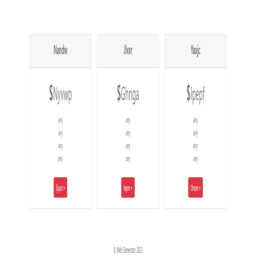

In [80]:
image, *_ = test_data.__getitem__(np.random.randint(len(test_data)))
t = transforms.ToPILImage()
image = image.unsqueeze(0)
t(image.squeeze())

In [81]:
image = image.cuda()
ct = []
ct.append(vocab.to_vec(' '))
ct.append(vocab.to_vec('<START>'))
output = ''
for i in range(200):
    context = torch.tensor(ct).unsqueeze(0).float().cuda()
    index = torch.argmax(net(image, context), 2).squeeze()[-1:].squeeze()
    v = vocab.to_vocab(int(index))
    if v == '<END>':
        break
    output += v
    ct.append(vocab.to_vec(v))

with open('./output.gui', 'w') as f:
    f.write(output)

print(output)

header{
container{
navbar-collapse-danger{
h-4
paragraph-lead
}
}
}
br
container{
text-center{
h1-long
br
paragraph-lead-long
}
}
container{
text-center{
h1-long
br
paragraph-lead-long
}
}
jumbotron-center{
container{
h-jumbotron
paragraph-lead-text-muted
p-btn{
btn-primary-my-2
btn-dark-my-2
}
}
}


Now from the compiler directory in your terminal run
`python web-compiler.py output.gui`.
This will generate a `output.html` file that you can open in your browser.